In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd
import scipy as sp
from scipy import signal
from scipy import stats

%matplotlib notebook

In [15]:
#import data
dataframe = pd.read_excel('Fluorescence measures_ATR.xlsx',
                          sheet_name='Rawdata_Fiji_Fly13_Decap',
                          skiprows=0)

#Important Mean 1 has to be the levator and mean 2 the depressor
#Chose if this condition has stim or not by putting true false and the frame where the stimulation was
stim= True
stim_time = 23
before_stim= stim_time-10


In [16]:
#Define Levator and Depressor mean fluorescences
levator_fluor = dataframe['Mean1']
depressor_fluor = dataframe['Mean2']
frames = dataframe['Frame']

#Find Max and min of fluorescence for both muscles
levator_fmax = max(levator_fluor)
levator_fmin = min(levator_fluor)

depressor_fmax = max(depressor_fluor)
depressor_fmin = min(depressor_fluor)

#Normalizing the fluorescence 
#Mean of each frame minus min
levator_fnorm = levator_fluor - levator_fmin
#Maximum minus minimum will give us the highest activity normalized
levator_maxnorm = levator_fmax - levator_fmin

#same for depressor muscle
depressor_fnorm = depressor_fluor - depressor_fmin
depressor_maxnorm = depressor_fmax - depressor_fmin

#Calculate percentage of muscles activity
levator_act = (levator_fnorm*100)/levator_maxnorm
depressor_act = (depressor_fnorm*100)/depressor_maxnorm
#print(np.array(levator_act))

#Calculate correlation between levator and depressor
#First we need to exclude areas where both muscle activity is null
levator_less5 = np.where(levator_act<5)[0] #Find where levator activity is smaller than 5%
#print(levator_less5)
depressor_less5 = np.where (depressor_act <5)[0] #Find where depressor activity is smaller than 5%
timewindow = np.intersect1d(levator_less5, depressor_less5) #Find where both muscles have activity <5
#use only the selected frames for the correlation analysis
#delete from the data the values in which activity of is belwo 5 for both of the muscles
levator_select = np.delete(np.array(levator_act), timewindow)
depressor_select= np.delete(np.array(depressor_act),timewindow)
#print((levator_select[stim_time:]))
#print((depressor_select[stim_time:]))

# We need to cut the time before the stimulus and calculate the correlation
if len(levator_select[stim_time:]) <2 or len(depressor_select[stim_time:]) <2:
    r='Na'
else:
    r,pvalue = stats.spearmanr(levator_select[stim_time:], depressor_select[stim_time:])
#r2,pvalue = stats.spearmanr(levator_select, depressor_select)
print(r)

-0.5464117401666192


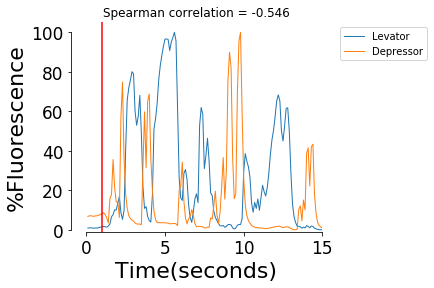

<Figure size 432x288 with 0 Axes>

In [17]:
#Plot showing the activity flutuations for each muscle
fig, ax = plt.subplots()

#define total number of frames after cutting 
if stim ==True:
    totalframes= len(levator_act[before_stim:])
    f= frames[0:totalframes]

    ax.plot(f, levator_act[before_stim:],linewidth = 1)
    ax.plot(f, depressor_act[before_stim:],linewidth = 1)

    #set title as spearman correlation
    ax.set_title('Spearman correlation = {}'.format(r.round(3)))

    # set ticks and tick labels
    ax.set_xlim((-10, 150))   
    #ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]) #for larger plots 
    #ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])           #for larger plots
    ax.set_xticks([0,50,100,150])
    ax.set_xticklabels([0,5,10,15])
    ax.set_xlabel('Time(seconds)',fontsize=22)
    ax.set_ylim((-1, 105))
    #ax.set_yticks([0, 50, 100])
    ax.set_ylabel('%Fluorescence',fontsize=22)

    # Only draw spine between the y-ticks
    ax.spines['left'].set_bounds(0, 100)
    ax.spines['bottom'].set_bounds(0,150)   #totalframes  
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    #ax.axhline(50, color = 'grey', ls='--')
    #ax.axhline(5, color = 'grey', ls='--')
    ax.axvline(x=10, color='red')

if stim == False:

    ax.plot(frames, levator_act)
    ax.plot(frames, depressor_act)

    #set title as spearman correlation
    ax.set_title('Spearman correlation = {}'.format(r))  #.round(3)

    # set ticks and tick labels
    ax.set_xlim((-10, 150))
    #ax.set_xticks([0,50,100,150])
    #ax.set_xticklabels([0,5,10,15])
    #ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
    #ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    ax.set_xlabel('Time(seconds)',fontsize=22)
    ax.set_ylim((-5, 100))
    #ax.set_yticks([0, 50, 100])
    ax.set_ylabel('%Fluorescence',fontsize=22)

    # Only draw spine between the y-ticks
    ax.spines['left'].set_bounds(0, 100)
    ax.spines['bottom'].set_bounds(0,150)
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    #ax.axhline(50, color = 'grey', ls='--')
    #ax.axhline(5, color = 'grey', ls='--')
    #ax.axvline(x=stim_time, color='red')

    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',labels= ('Levator','Depressor'))

plt.tight_layout()

plt.tick_params(labelsize=17) 
plt.show()

plt.savefig('New ATR Decap Fluorescence Fly6.svg')
#plt.savefig('ATR Decap Fluorescence Fly12(23ori).png')